<a href="https://colab.research.google.com/github/Distortedlogic/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Jeremy_Meek_LS_DS_124_Sequence_your_narrative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence Your Narrative - Assignment

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

# ASSIGNMENT
 

1.   Replicate the Lesson Code
2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import product

income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [0]:
merged = pd.merge(income, lifespan)
merged = pd.merge(merged, population)

features = ['country', 'name', 'world_4region', 'world_6region']
df = pd.merge(merged, entities[features], left_on='geo', right_on='country')

In [0]:
pretty_names = {
    'country': 'country_code',
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': '6region',
    'world_4region': '4region'
}
df = df.rename(columns = pretty_names)

In [0]:
'''
Dataframe Generation Cell
- Filter df by USA
- define years Recessions occurred
- filter by recession's years into new dataframe for each recession
- insert column with string value of recession era name
'''

usa = df[df['country'] == 'United States']

great_depression = range(1927,1933)
dotcom_bubble = range(1998, 2004)
great_recession = range(2005, 2011)
stagflation = range(1971, 1977)
#high_fed_funds_rate = range(1979,1982)

gd = usa[usa.year.isin(great_depression)]
dc = usa[usa.year.isin(dotcom_bubble)]
gr = usa[usa.year.isin(great_recession)]
sf = usa[usa.year.isin(stagflation)]
#ffr = df[df.year.isin(high_fed_funds_rate)]

gd.insert(0, 'era', 'Great Depression')
dc.insert(0, 'era', 'Dot Com Bubble')
gr.insert(0, 'era', 'Great Recession')
sf.insert(0, 'era', 'Stagflation')
#ffr.insert(0, 'era', 'High Federal Funds Rate')

#final = pd.concat([gd, dc, gr, sf, ffr])

In [0]:
'''
Ploting Parameters Cell:
- list of recession dataframes
- plot title
- plot colors list
- create index list for 2 by 2 subplot axises
- create dict with recession era : description string for annotation
- create dict with recession era : approx data point for annotation to point at
- create dict with recession era : annotation text offset from datapoint
'''

recessions = [gd, sf, dc, gr]
title = 'Dot Com Bubble, The Only Recession Not To Drop USA Income?'
colors = ['#9DE0AD', '#45ADA8', '#547980', '#594F4F']

ax_idx = list(product([0,1], [0,1]))

description = {
    'Great Depression':'Stock Market Crash',
    'Stagflation':'High Unemployment and Inflation',
    'Dot Com Bubble':'Internet Bubble Pops',
    'Great Recession':'Housing Market Implodes'
}
timing = {
    'Great Depression':(1929,11_200),
    'Stagflation':(1973, 26_500),
    'Dot Com Bubble':(2000, 46_000),
    'Great Recession':(2007, 51_000)
}
offset = {
    'Great Depression':(-1.1, -1000),
    'Stagflation':(-.5, -1000),
    'Dot Com Bubble':(0, -1500),
    'Great Recession':(-1.35, -1000)
}

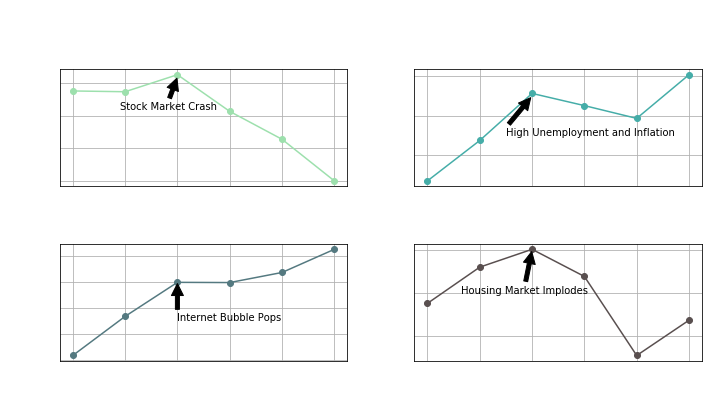

In [159]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

for recession, i, color in zip(recessions, ax_idx, colors):

  era = recession['era'].any()

  ax[i].plot(recession['year'], recession['income'], color=color, marker='o')

  ax[i].set_title(era, color='w')
  ax[i].grid()

  xytext = [sum(x) for x in zip(timing[era],offset[era])]
  ax[i].annotate(description[era], xy=timing[era], xytext=xytext, arrowprops=dict(facecolor='black', shrink=0.05))

  ax[i].set_xlabel('Year')
  ax[i].xaxis.label.set_color('w')
  ax[i].tick_params(axis='x', colors='w')

  ax[i].set_ylabel('Income')
  ax[i].yaxis.label.set_color('w')
  ax[i].tick_params(axis='y', colors='w')

fig.tight_layout()
fig.suptitle(title, color='w', fontsize=20, y=1.1)

plt.show()

After each recession we see two years of non-trivial income decline in the USA except for during the Dot Com Bubble. The year after the point of the internet bubble pop, there was a negligible decrease in income and a non-negligible increase the year after that. This behavior breaks the trend of the other recessions.

# STRETCH OPTIONS

## 1. Animate!

- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- Try using [Plotly](https://plot.ly/python/animations/)!
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
- [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

## 2. Study for the Sprint Challenge

- Concatenate DataFrames
- Merge DataFrames
- Reshape data with `pivot_table()` and `.melt()`
- Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

## 3. Work on anything related to your portfolio site / Data Storytelling Project

In [0]:
# Portfolio Project